# Data Modeling

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

**Explanation:**
- Imports all necessary libraries for data manipulation (pandas), model evaluation (sklearn.metrics), and clustering (KMeans).
- matplotlib.pyplot and seaborn are used for visualization.

## Data Preparation

In [ ]:
# Load the dataset
data_ml = pd.read_csv("superstore_data_for_ml.csv")

# Feature Selection for simplicity
selected_features = ['Quantity', 'Discount', 'Processing Time', 'Profit Margin', 'Category', 'Region']

**Explanation:** selected_features includes numerical features (e.g., Quantity, Profit Margin) and categorical features (Category, Region).

In [ ]:
# Encode categorical columns using LabelEncoder
label_encoders = {}
for col in ['Category', 'Region']:
    le = LabelEncoder()
    data_ml[col] = le.fit_transform(data_ml[col])
    label_encoders[col] = le  # Store encoders for potential reverse transformation


**Explanation:** LabelEncoder is used to transform categorical variables (Category, Region) into numeric values.

In [ ]:
# Separate features and targets
X = data_ml[selected_features]
y_regression = data_ml['Sales']  # Target for regression
y_classification = (data_ml['Profit'] > 0).astype(int)  # Binary classification (1 if profit > 0, else 0)

# Split the data into train and test sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_classification, test_size=0.2, random_state=42)

**Explanation:**
- Sales is the target for predicting sales.
- A binary target is created for Profit (1 if positive, 0 if negative).
- Divides the dataset into training (80%) and testing (20%) sets for regression and classificatin tasks.

In [ ]:
# Function to evaluate regression models
def evaluate_regression(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
    print(f"R²: {r2_score(y_test, y_pred):.2f}")

**Explanation:**
- MAE: Mean Absolute Error measures average prediction error.
- RMSE: Root Mean Squared Error penalizes larger errors.
- R²: Measures variance explained by the model.

In [ ]:
# Function to evaluate classification models
def evaluate_classification(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")

**Explanation:**
- Accuracy: Proportion of correct predictions.
- Precision: How many predicted positives are true positives.
- Recall: How many true positives are correctly identified.
- F1 Score: Harmonic mean of precision and recall.

## Regression Models

In [ ]:
# Linear Regression
print("Linear Regression Performance:")
evaluate_regression(LinearRegression(), X_train_reg, X_test_reg, y_train_reg, y_test_reg)

Linear Regression Performance:
MAE: 0.59
RMSE: 1.03
R²: 0.08


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Interpretation:** The model explains only 8% of the variance, indicating poor performance.

In [ ]:
# Decision Tree Regressor
print("\nDecision Tree Regressor Performance:")
evaluate_regression(DecisionTreeRegressor(random_state=42), X_train_reg, X_test_reg, y_train_reg, y_test_reg)


Decision Tree Regressor Performance:
MAE: 0.49
RMSE: 1.04
R²: 0.07


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Interpretation:** Similar performance to Linear Regression, but with slightly lower MAE.

In [ ]:
# Random Forest Regressor
print("\nRandom Forest Regressor Performance:")
evaluate_regression(RandomForestRegressor(random_state=42, n_estimators=50), X_train_reg, X_test_reg, y_train_reg, y_test_reg)


Random Forest Regressor Performance:
MAE: 0.41
RMSE: 0.79
R²: 0.46


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Interpretation:** Random Forest performs the best, explaining 46% of the variance.

## Classification Models

In [ ]:
# Logistic Regression
print("\nLogistic Regression Performance:")
evaluate_classification(LogisticRegression(max_iter=1000), X_train_cls, X_test_cls, y_train_cls, y_test_cls)


Logistic Regression Performance:
Accuracy: 0.77
Precision: 0.61
Recall: 0.27
F1 Score: 0.37


**Interpretation:** Poor recall indicates that the model struggles to identify all positive cases.

In [ ]:
# Decision Tree
print("\nDecision Tree Classifier Performance:")
evaluate_classification(DecisionTreeClassifier(random_state=42), X_train_cls, X_test_cls, y_train_cls, y_test_cls)


Decision Tree Classifier Performance:
Accuracy: 0.78
Precision: 0.57
Recall: 0.52
F1 Score: 0.55


**Interpretation:** Better balance of precision and recall compared to Logistic Regression.

In [ ]:
# Random Forest
print("\nRandom Forest Classifier Performance:")
evaluate_classification(RandomForestClassifier(random_state=42, n_estimators=50), X_train_cls, X_test_cls, y_train_cls, y_test_cls)


Random Forest Classifier Performance:
Accuracy: 0.80
Precision: 0.61
Recall: 0.57
F1 Score: 0.59


**Interpretation:** Random Forest performs best overall, with improved recall and F1 score.

## Clustering

In [ ]:
# Feature Selection for Clustering
# Select only numerical features for clustering
clustering_features = ['Sales', 'Profit', 'Quantity', 'Discount', 'Processing Time']
X_clustering = data_ml[clustering_features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

**Explanation:** Selects numerical features for clustering and standardizes them for better performance.

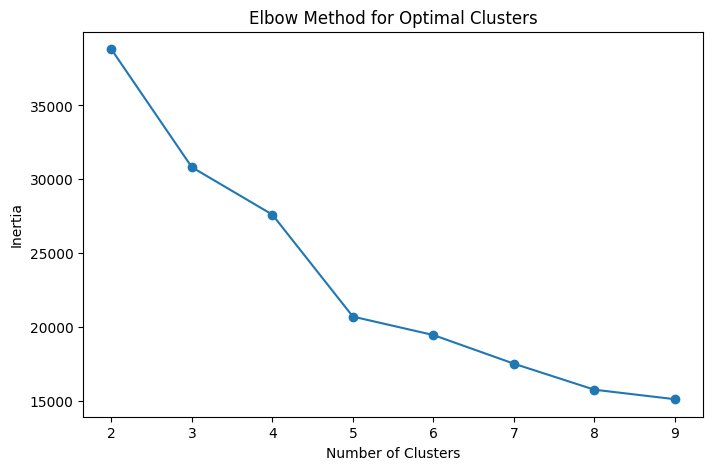

In [ ]:
#K-Means Clustering
# Determine the optimal number of clusters using the elbow method
inertia = []
range_n_clusters = range(2, 10)  # Test clusters from 2 to 9

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# Choose the optimal number of clusters (e.g., 3) based on the elbow curve
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original dataset
data_ml['Cluster'] = kmeans.labels_

**Explanation:** Tests cluster counts from 2 to 9 using the elbow method to identify the optimal number of clusters.

In [ ]:
#Evaluate the Clustering
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score for {optimal_clusters} Clusters: {silhouette_avg:.2f}")

Silhouette Score for 3 Clusters: 0.41


**Interpretation:** The "elbow" in the curve suggests the optimal number of clusters (e.g., 3).

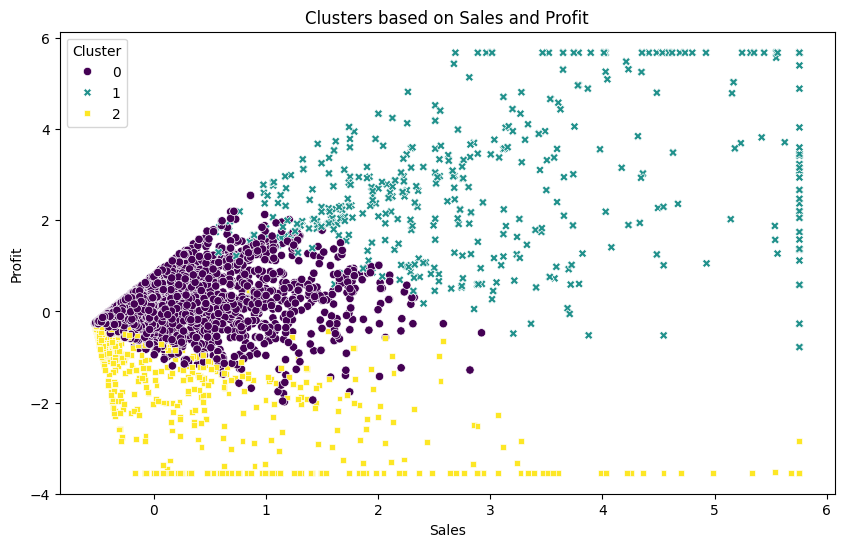

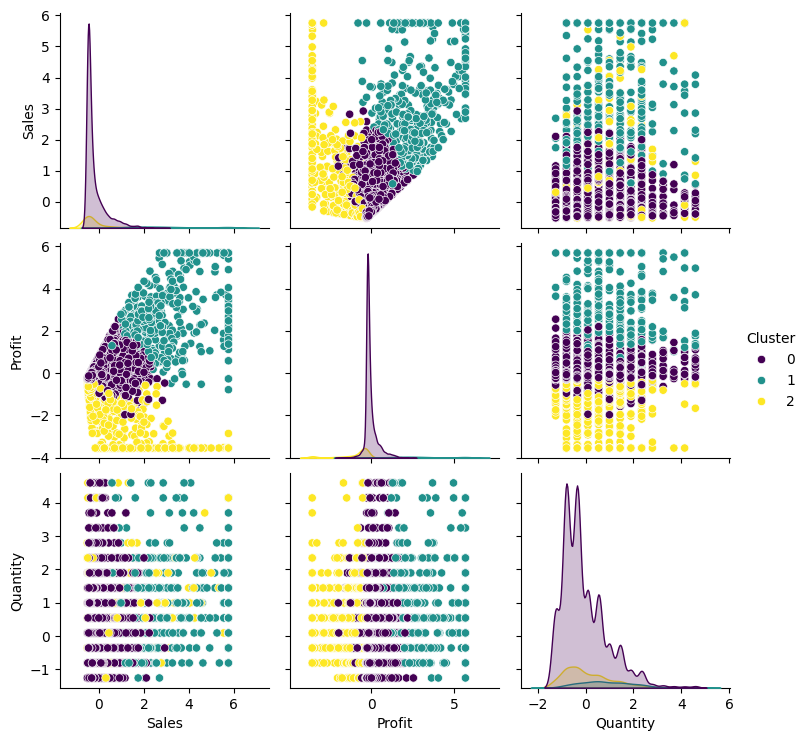

In [ ]:
#Visualize the Clusters
# Scatter plot for two dimensions
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data_ml['Sales'],
    y=data_ml['Profit'],
    hue=data_ml['Cluster'],
    palette='viridis',
    style=data_ml['Cluster'],
)
plt.title("Clusters based on Sales and Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.legend(title="Cluster")
plt.show()

#Pairplot to visualize all dimensions
sns.pairplot(data_ml, vars=['Sales', 'Profit', 'Quantity'], hue='Cluster', palette='viridis')
plt.show()

**Interpretation:** Clusters differentiate groups based on sales and profit characteristics, enabling insights into customer or product segments.